# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

Conduct EDA on telecom's customers' demographic and behavioral data to examine how dose relate the customer churn

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from eda_module import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
data = pd.read_csv('churn_data.csv')
df = data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6490 entries, 0 to 6489
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6490 non-null   object 
 1   Gender             6490 non-null   int64  
 2   Senior Citizen     6490 non-null   int64  
 3   Partner            6490 non-null   object 
 4   Dependents         6490 non-null   object 
 5   Tenure             6490 non-null   int64  
 6   Phone Service      6490 non-null   object 
 7   Multiple Lines     6490 non-null   object 
 8   Internet Service   6490 non-null   object 
 9   Online Security    6490 non-null   object 
 10  Online Backup      6490 non-null   object 
 11  Device Protection  6490 non-null   object 
 12  Tech Support       6490 non-null   object 
 13  Streaming TV       6490 non-null   object 
 14  Streaming Movies   6490 non-null   object 
 15  Contract           6490 non-null   object 
 16  Paperless Billing  6490 

In [4]:
df.head()

CustomerID  Gender  Senior Citizen Partner Dependents  Tenure  \
0  7590-VHVEG       0               0     Yes         No       1   
1  5575-GNVDE       1               0      No         No      34   
2  3668-QPYBK       1               0      No         No       2   
3  7795-CFOCW       1               0      No         No      45   
4  9237-HQITU       0               0      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

  Monthly Charges  Total Charges  Churn  
0           29.85          29.85     No  
1           56.95        1889.50     No  
2           53.85         108.15    Yes  
3           42.30        1840.75     No  
4           70.70         151.65    Yes  

[5 rows x 21 columns]

In [18]:
df.columns = df.columns.str.replace(' ', '')

In [19]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'grouped_tenure'],
      dtype='object')

In [20]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 6490 

Features: 22 

Missing Values: 0 

Unique Values: customerid          6490
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                72
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1553
totalcharges        6046
churn                  2
grouped_tenure         6
dtype: int64 



# **Our Data**
We have 7043 rows (each representing a unique customer) with 21 columns:     19 features, 1 target feature (Churn)
### **Target:**
- Churn (binary)
    
### **Nominal Features:**
- Tenure
- MonthlyCharges
- TotalCharges
    
### **Categorical Features:**
- Gender
- SeniorCitizen
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
    

# **1. General EDA**

## 1.1 Target: Churn

In [ ]:
# Replace all missing string values with 0
df.total charges = df.total charges.replace(" ", 0)
df.to_csv('reg_data.csv')

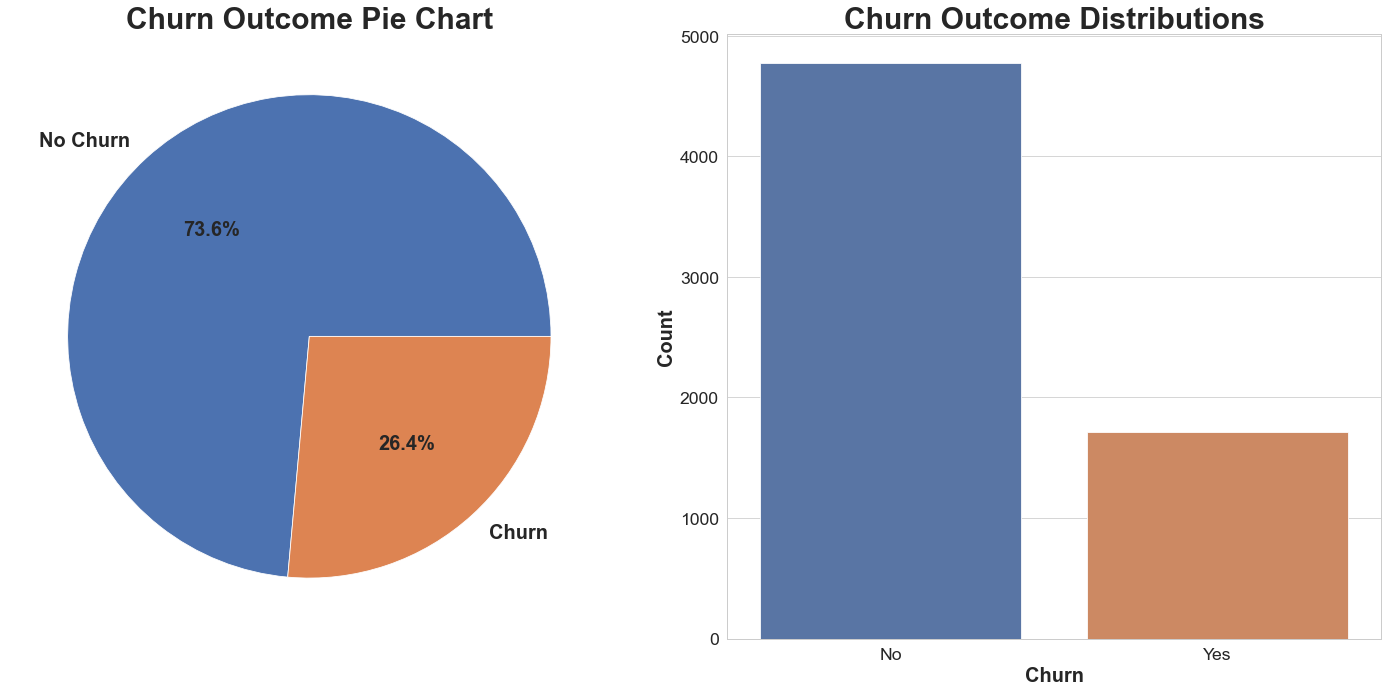

In [21]:
plot_target_dist(df)

# 2. Numerical Feature EDA

## 2.1 Kernel Density Estimations - Tenure, Monthly Charges, Total Charges

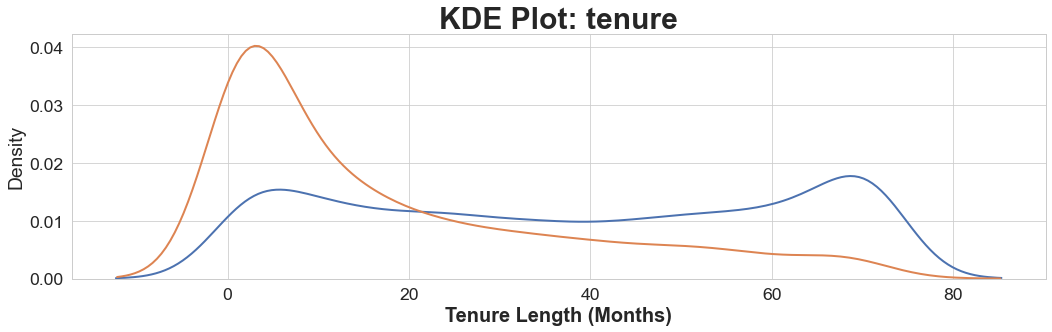

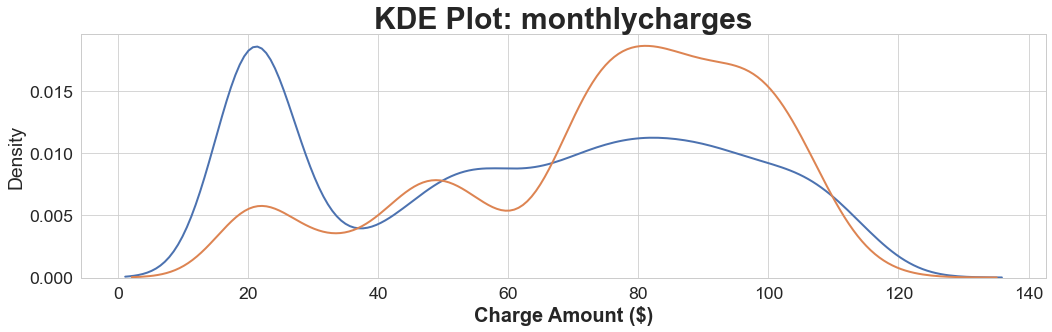

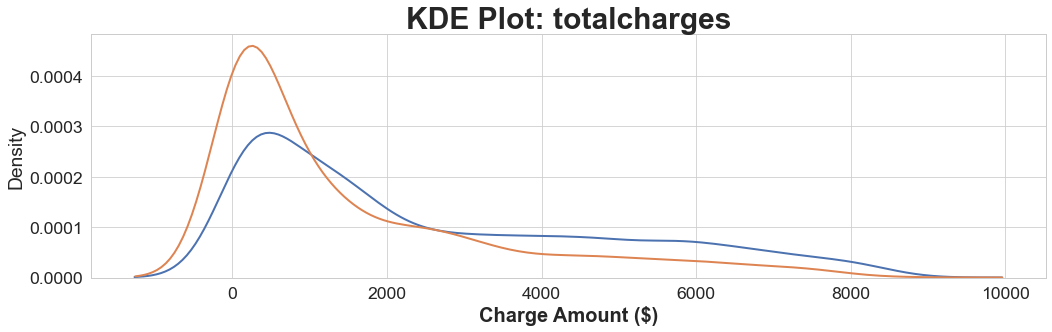

In [22]:
plot_kde(df, 'tenure')
plot_kde(df, 'monthlycharges')
plot_kde(df, 'totalcharges')

## 2.3 Grouping Tenure

In [10]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

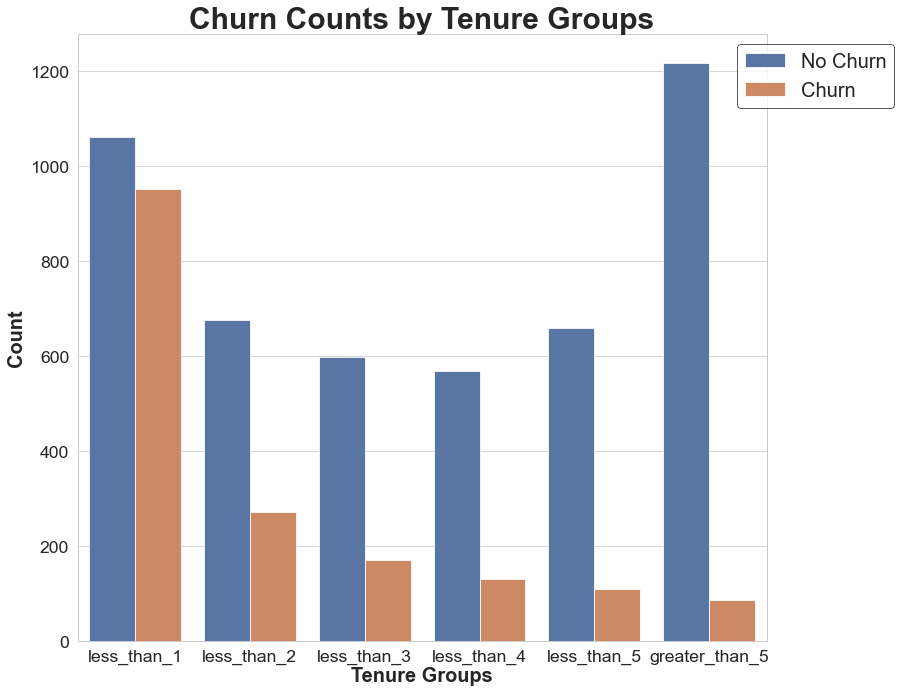

In [11]:
tenure_group_counts(df)

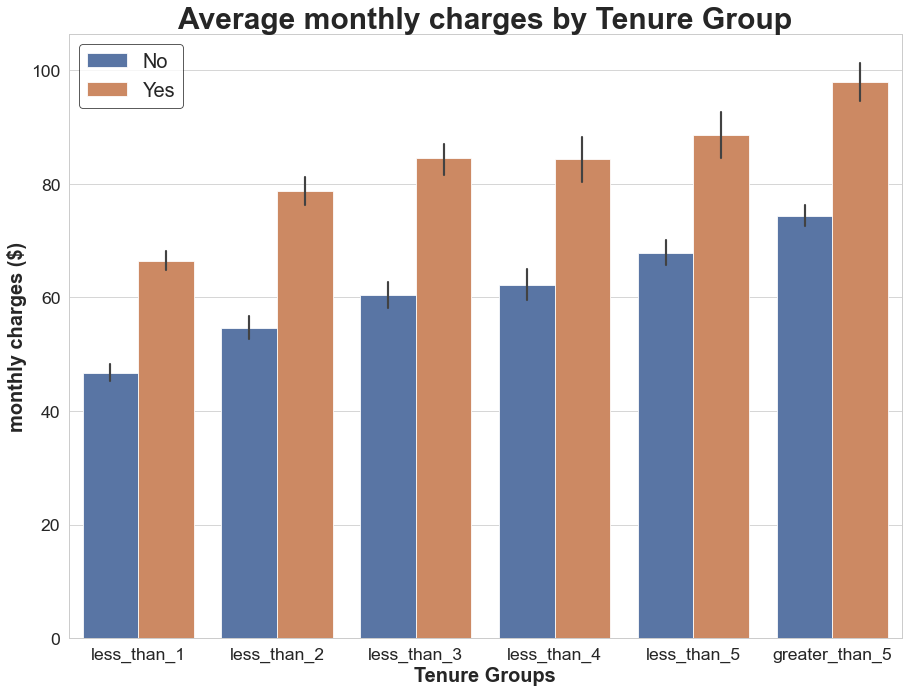

In [13]:
plot_numerical_averages(df, 'monthly charges')

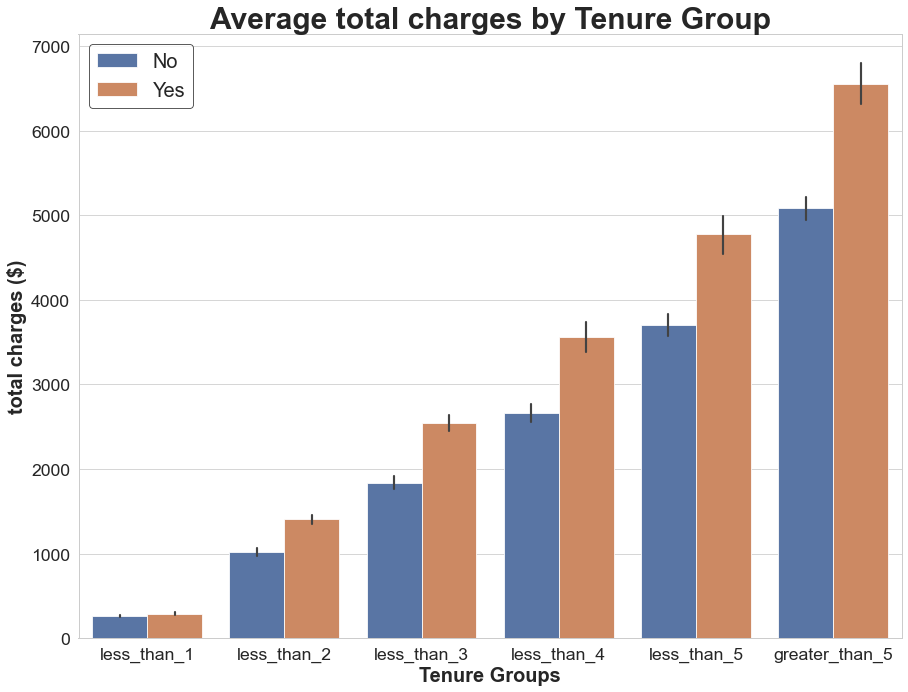

In [14]:
plot_numerical_averages(df, 'total charges')

**Numeric Variable Conclusions:**
- Tenure: Customers with lower service tenures (newer clients) have a higher probability of churning than those with long tenures.
- Monthly Charges: Generally speaking, Likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. Customers who do not churn are most likely to have bills around 20 dollars, followed by just over 80 dollars. 
- Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

# 3. Categorical Features

## 3.1 Gender

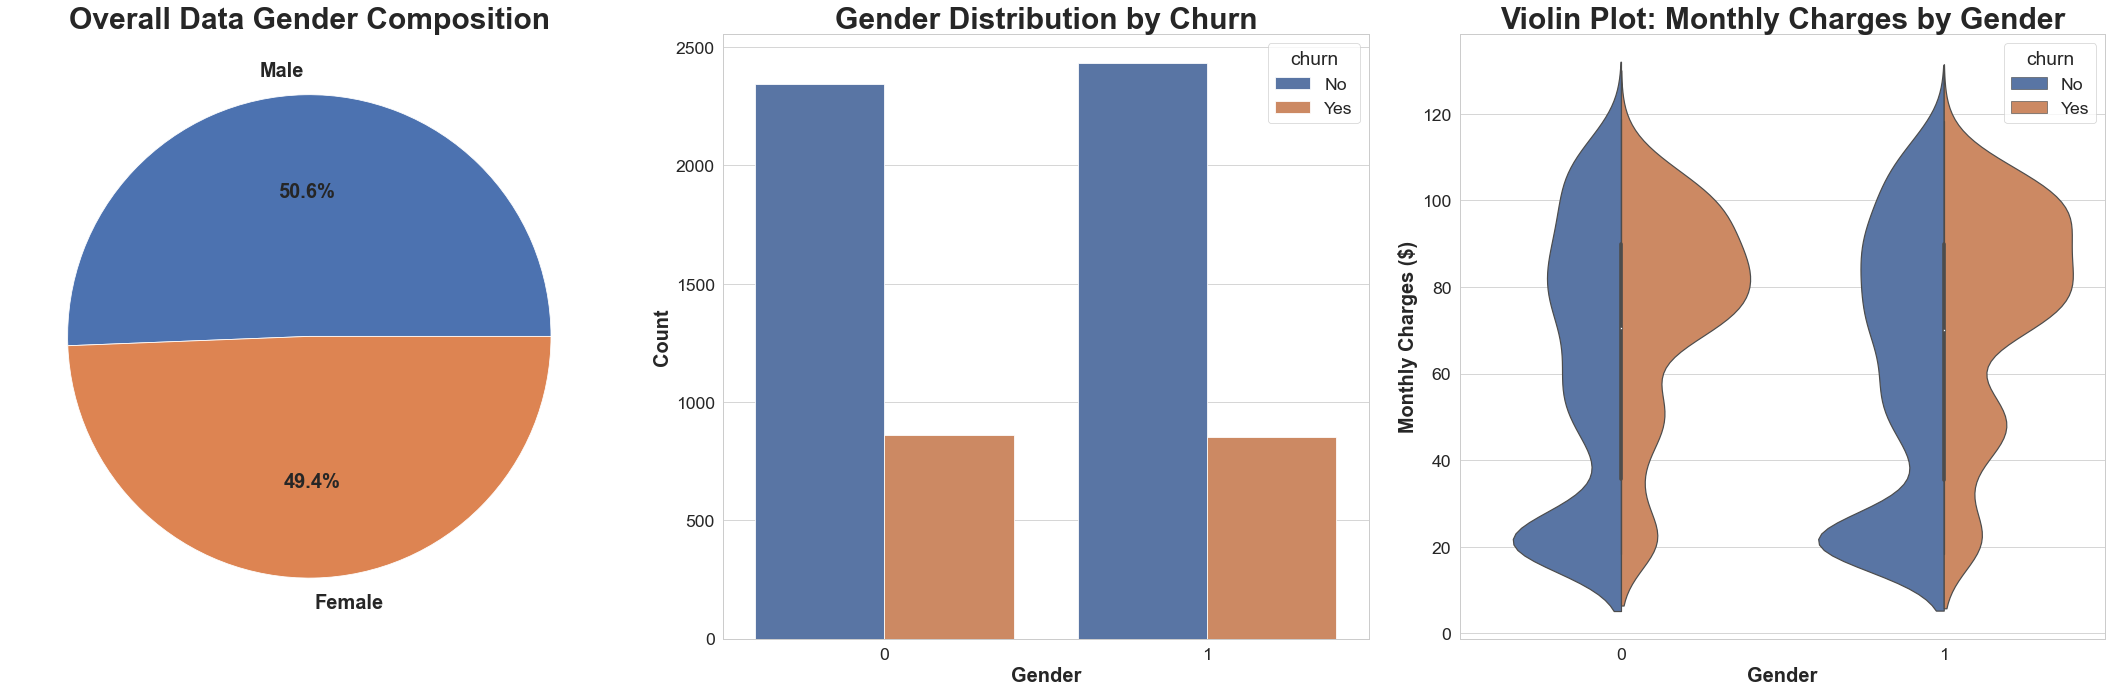

In [23]:
plot_gender_dist(df)

**Gender Conclusion:** Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

## 3.2 Age

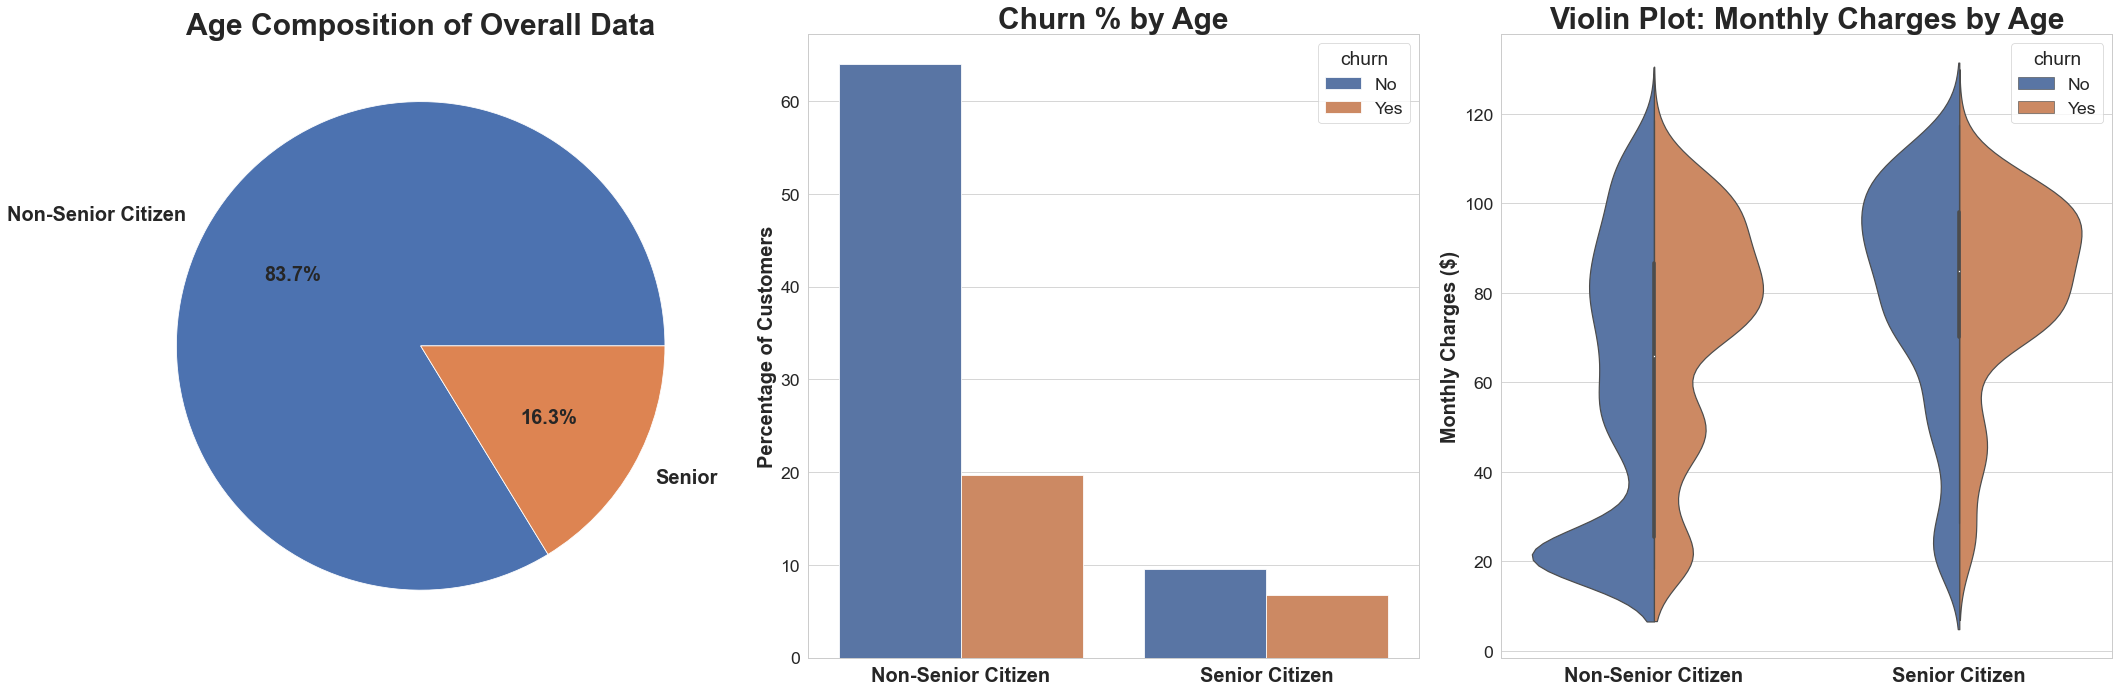

In [24]:
plot_age_dist(df)

**Age Conclusion:**
- Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
- *Overall*, more non-senior citizens churn than senior citizens
- A higher *proportion* of senior citizens churn than non-senior citizens

## 3.3 Partner & Dependents

In [25]:
df[df.churn == 'Yes'].partner.value_counts()

No     1099
Yes     616
Name: partner, dtype: int64

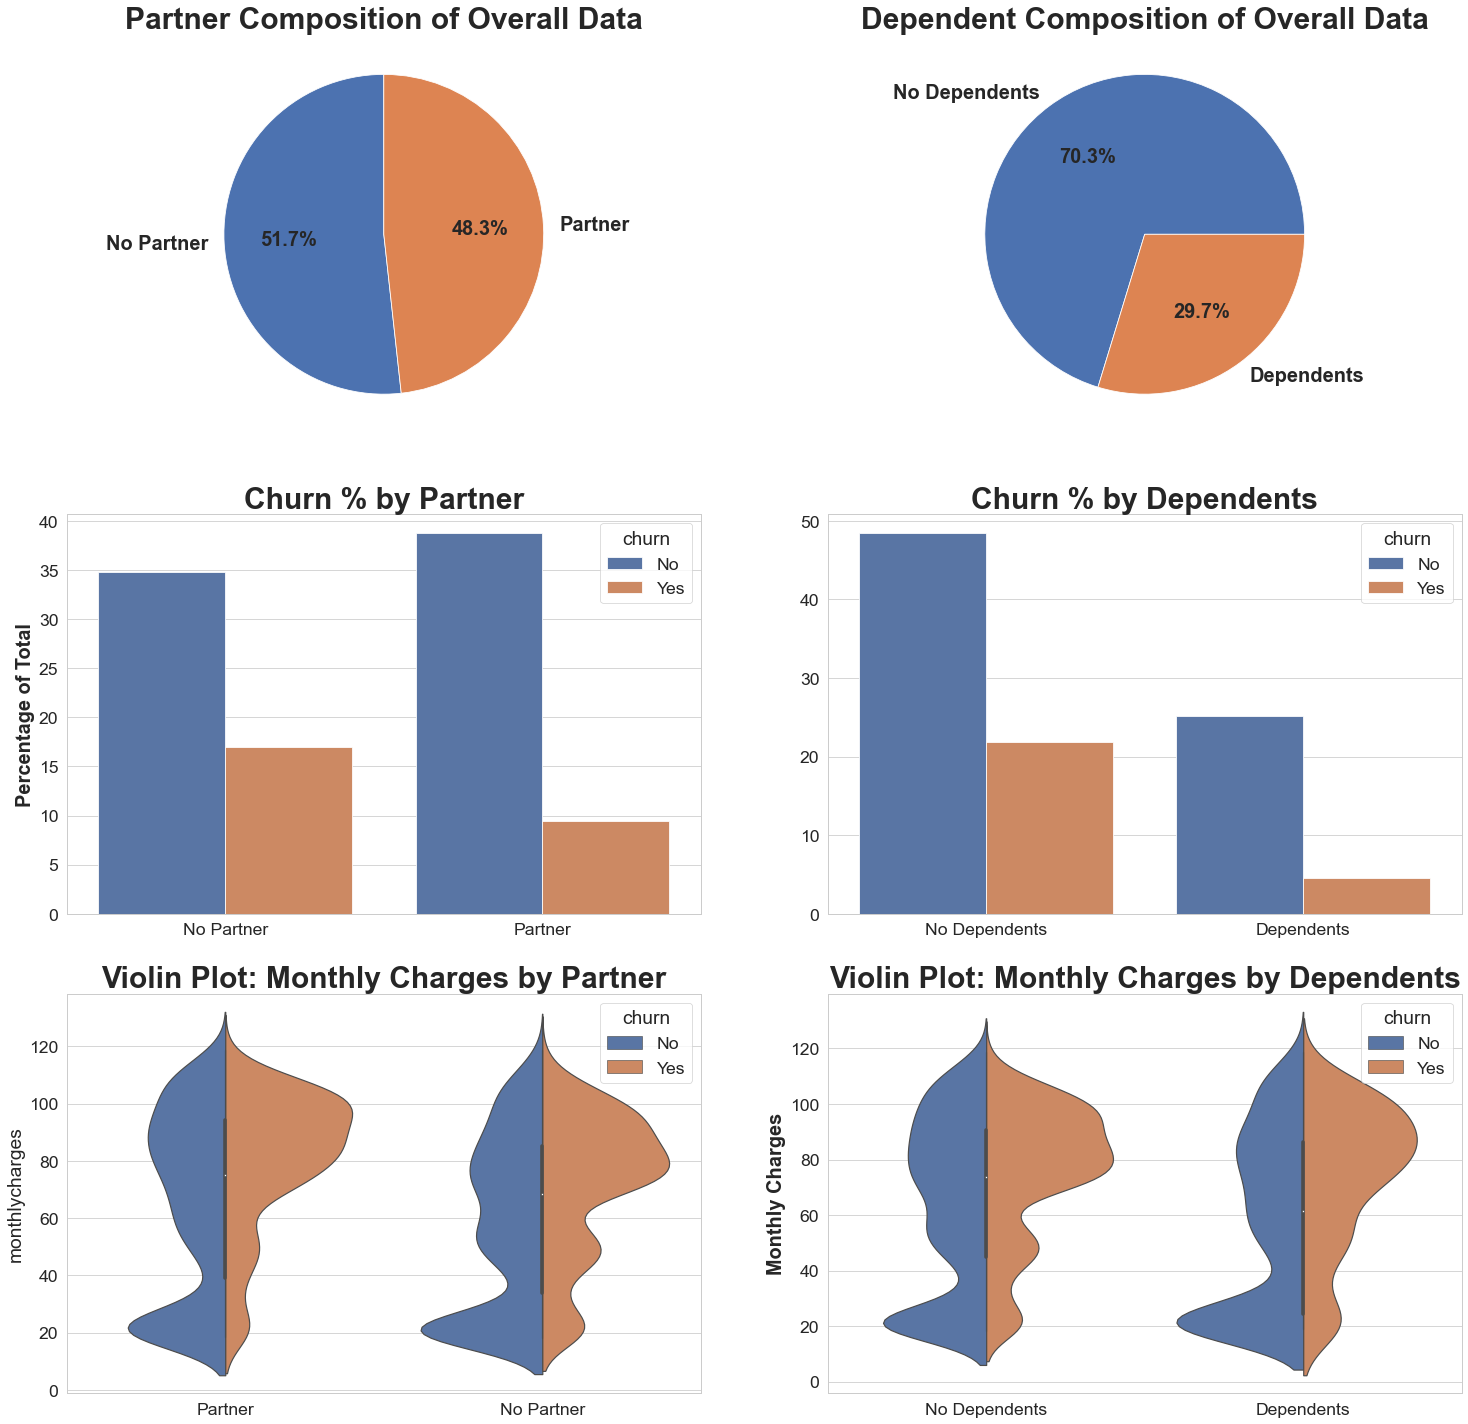

In [26]:
plot_partner_dependents(df)

**Partner/Dependent Conclusions:**
- Overall, those without partners are more likely to churn than those with partners
- Customers without dependents are more likely to churn than those with dependents

## 3.4 Phone Services & Line Quantities

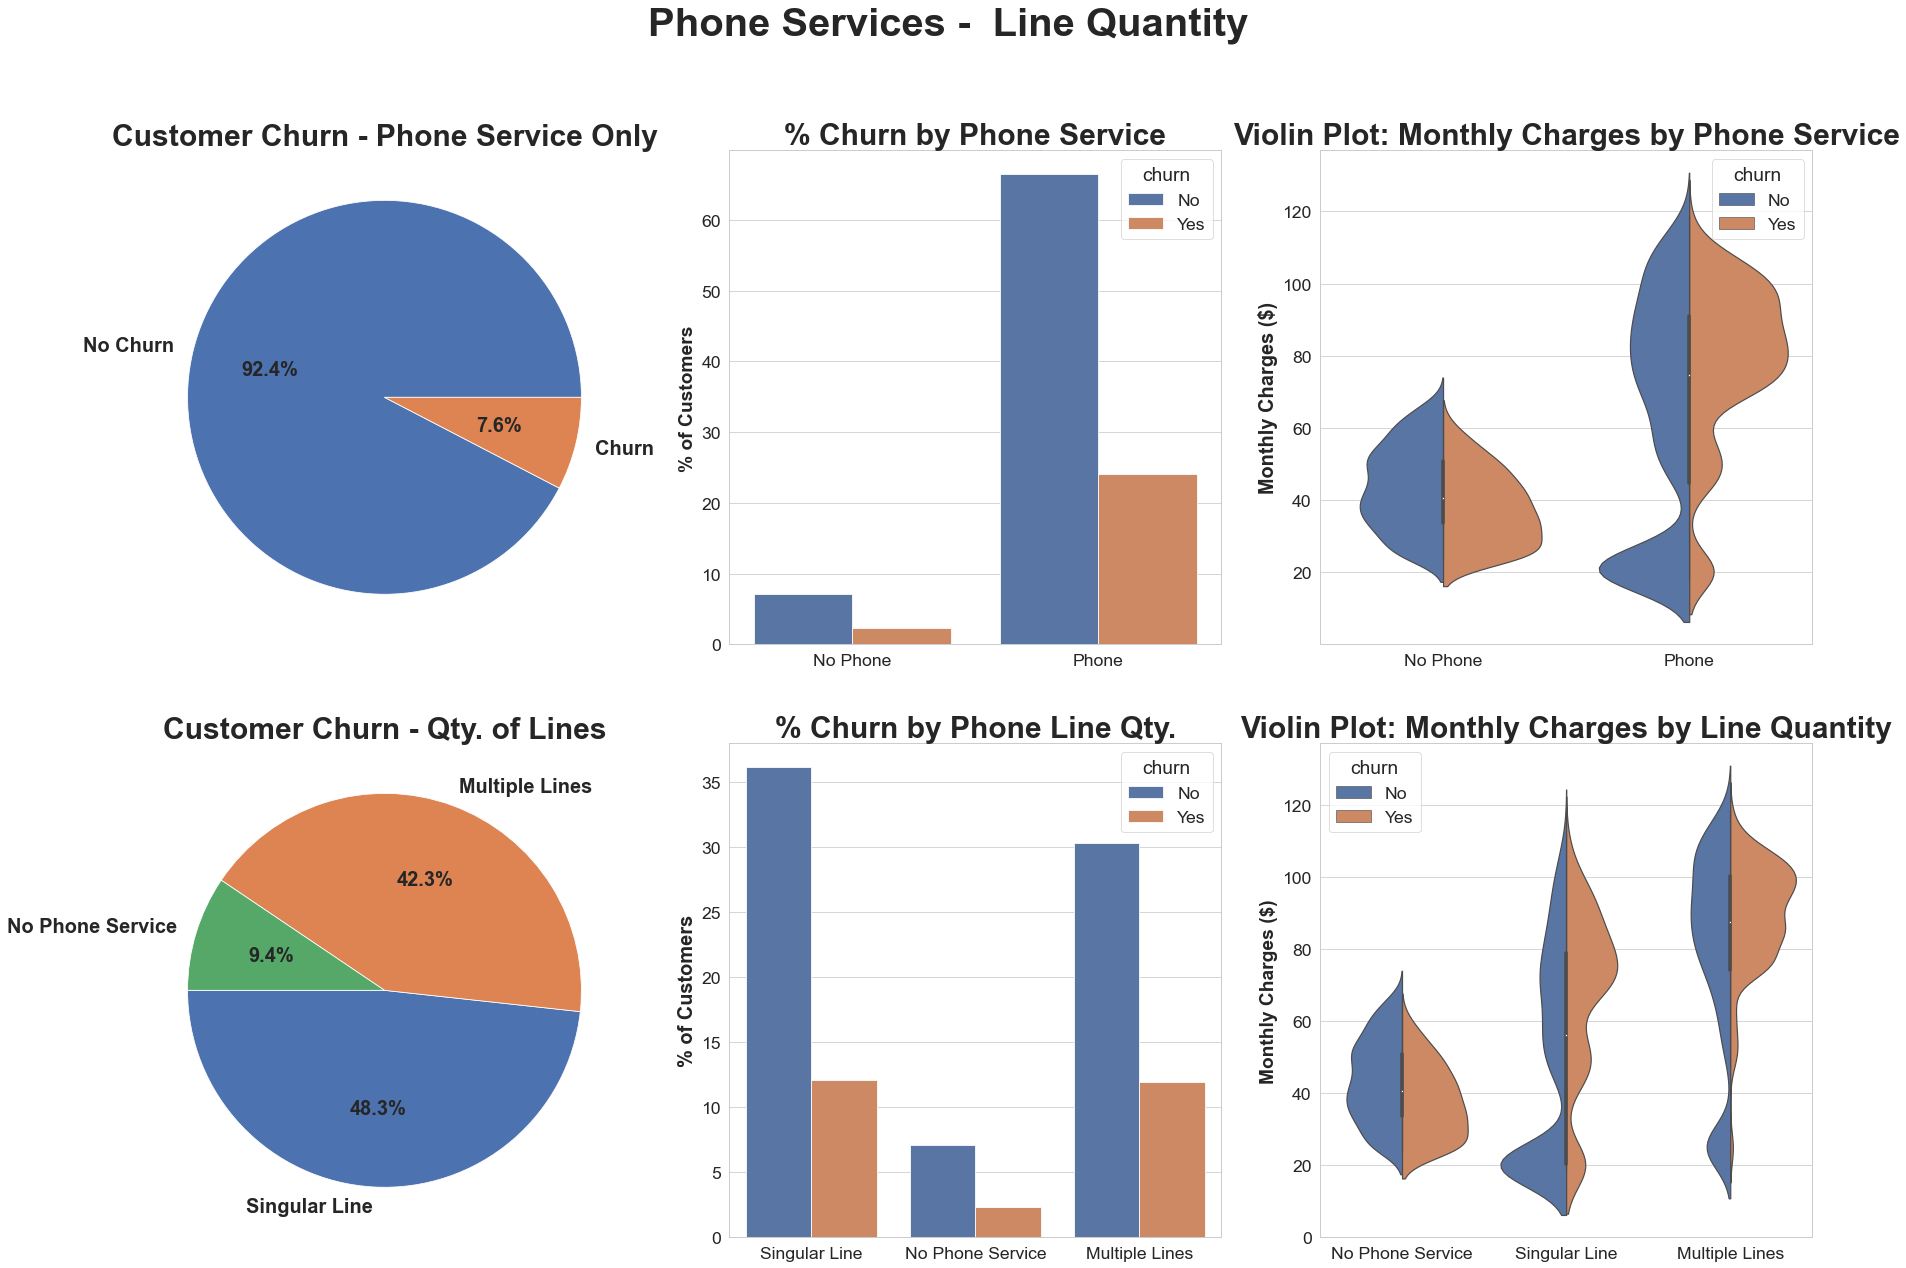

In [38]:
plot_phone_services(df)

**Phone Service Conclusions:**
- Significantly more customers with only phone service will not churn than those other customers
- People with only phone service churn ~25% of the time
- Customers with phone services only pay a higher average monthly charge
- Customers with multiple lines churn at approximately the same rate as those with a singular line
- Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone lines

## 3.5 Internet Service

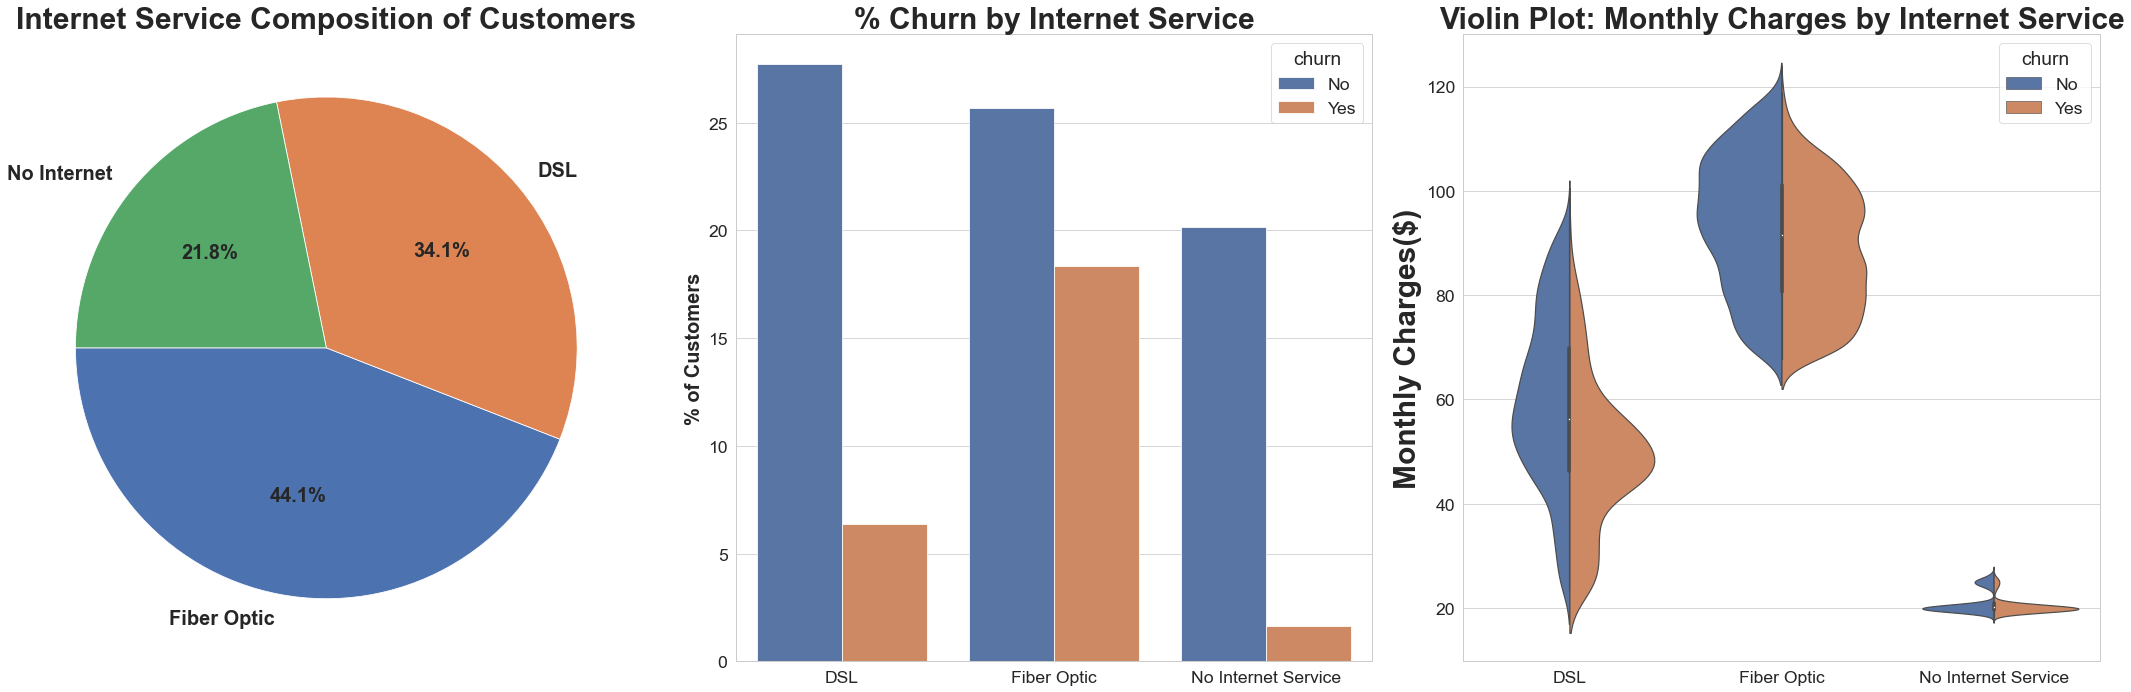

In [28]:
plot_internet_services(df)

## 3.6 Add-On Services

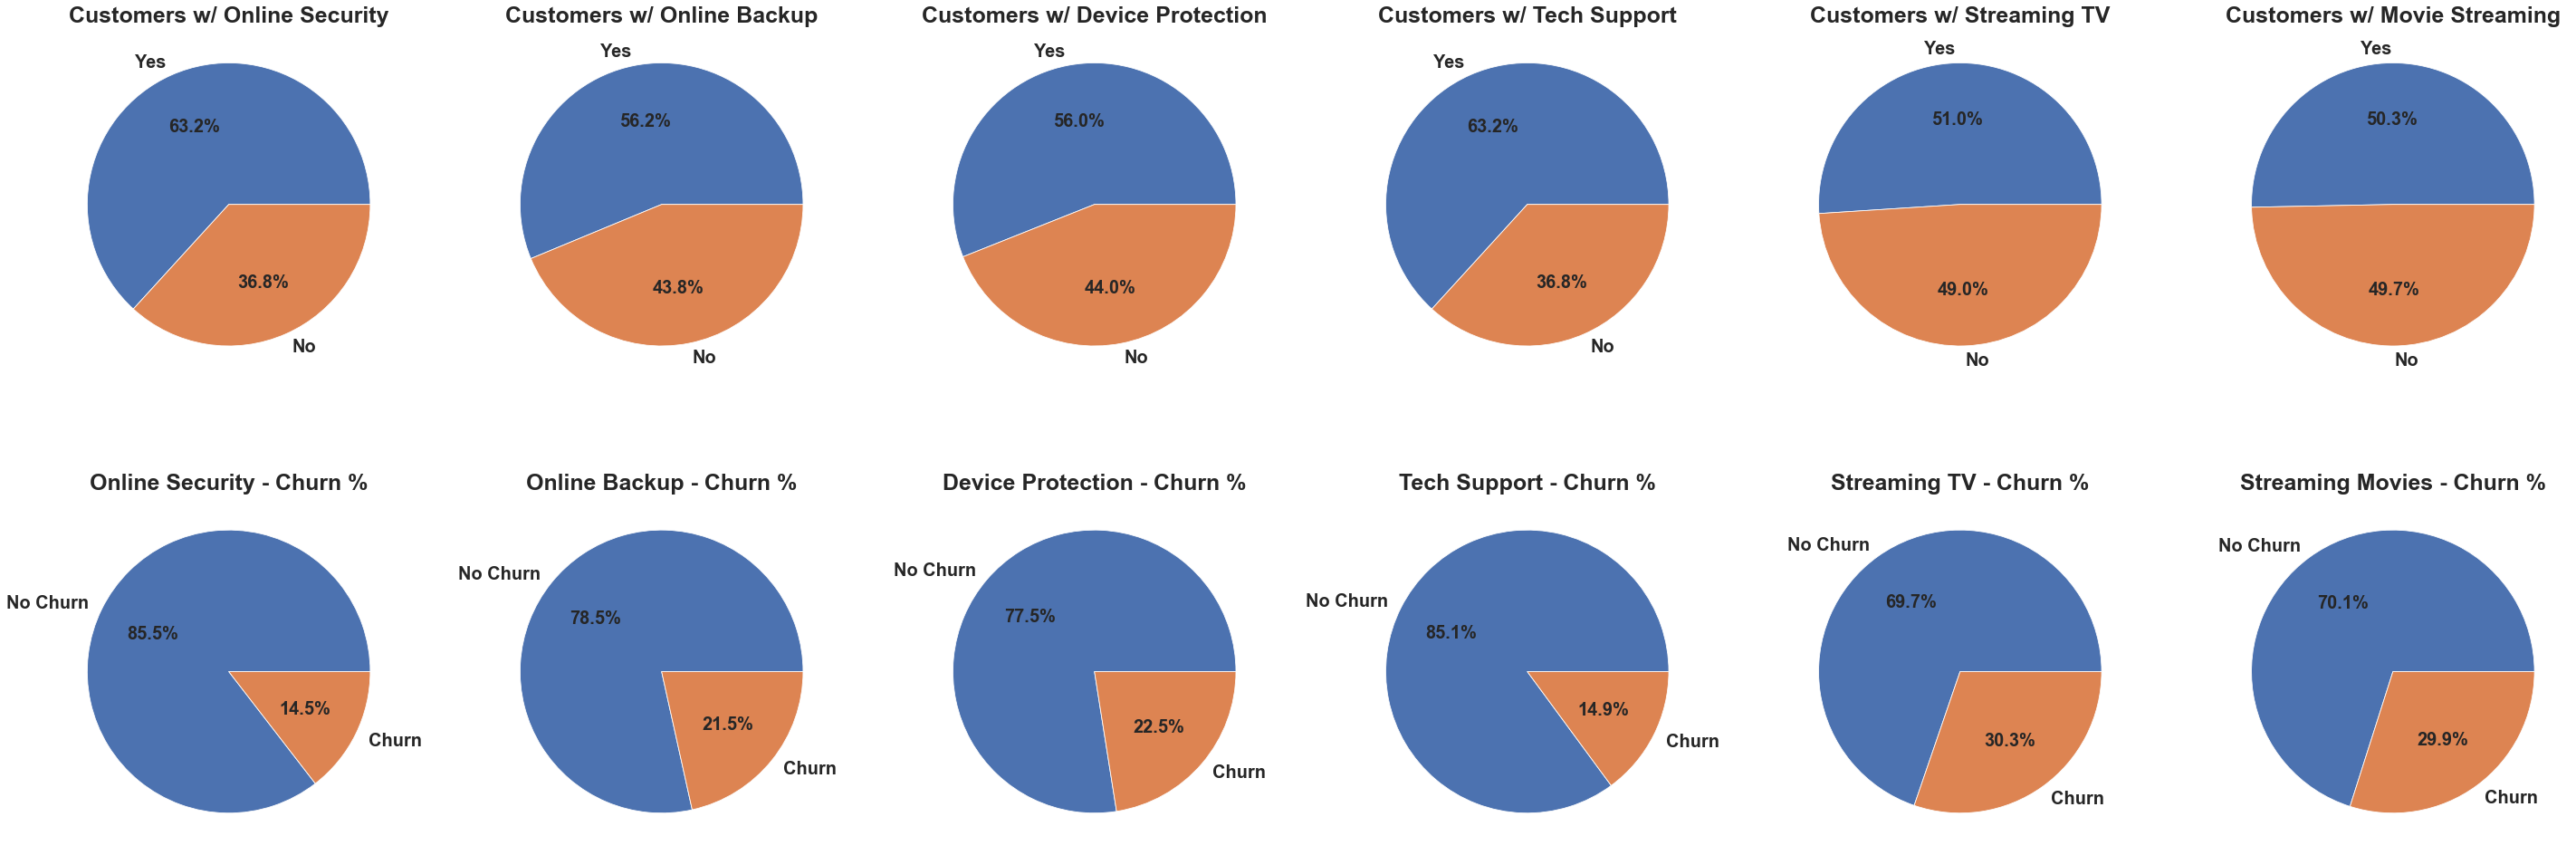

In [29]:
plot_services(df)

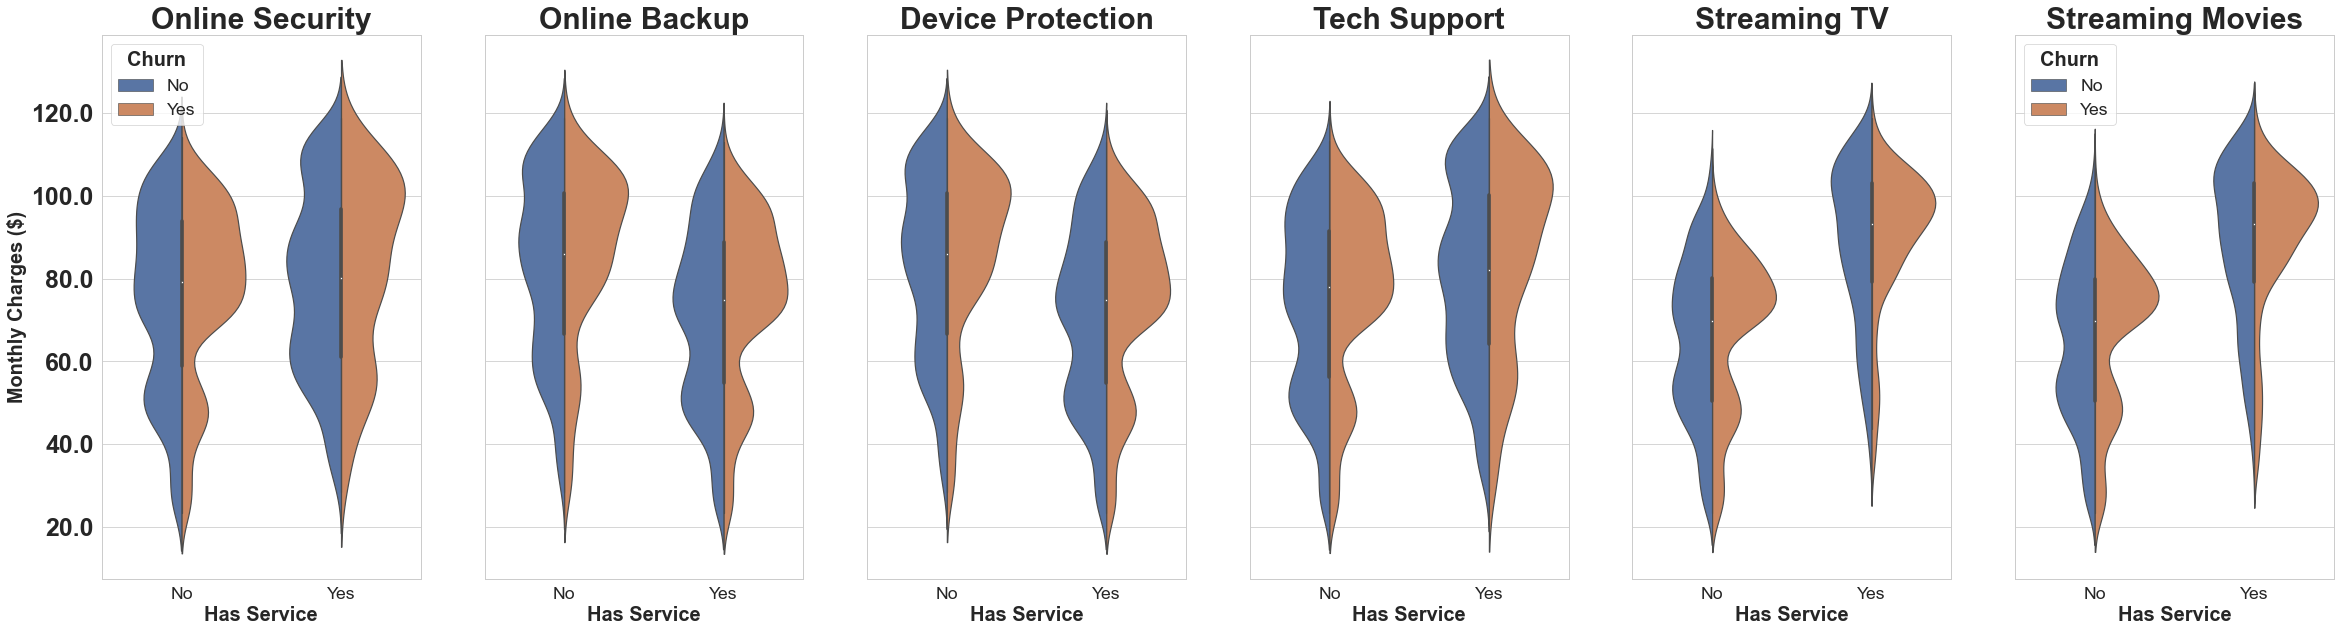

In [30]:
plot_service_charges(df)

**Add-On Service Conclusions:**
- Customers with TV Streaming and/or Movie streaming services churn more than all other services. 
- Churn for customers in most categories peaks around a monthly charge of $100

## 3.7 Contracts

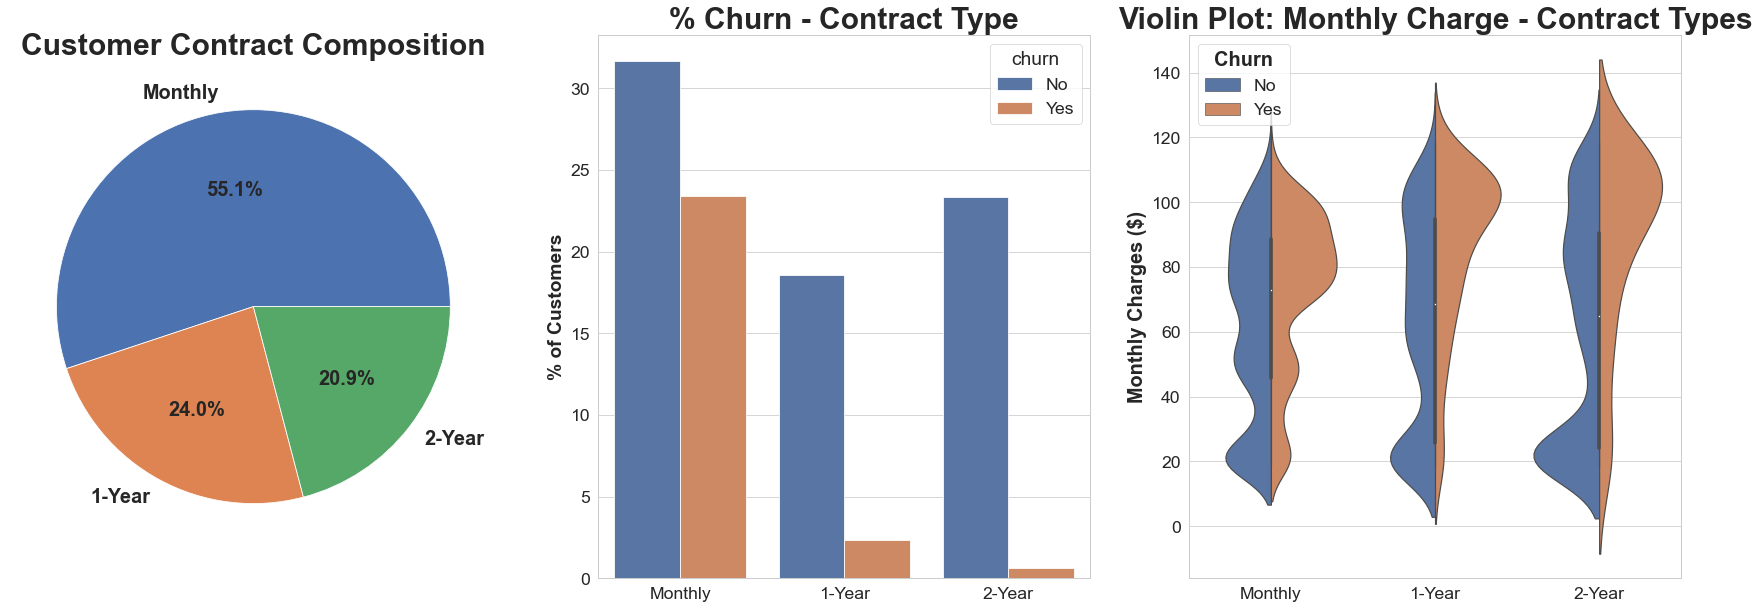

In [31]:
plot_contracts(df)

**Contract Conclusion:**
- More than half of customers use a monthly payment option
- Significantly more customers churn on monthly plans
- The longer the plan, the lower the churn rate
- Monthly charges are generally higher the longer the contract is

## 3.8 Paperless Billing & Payment Methods

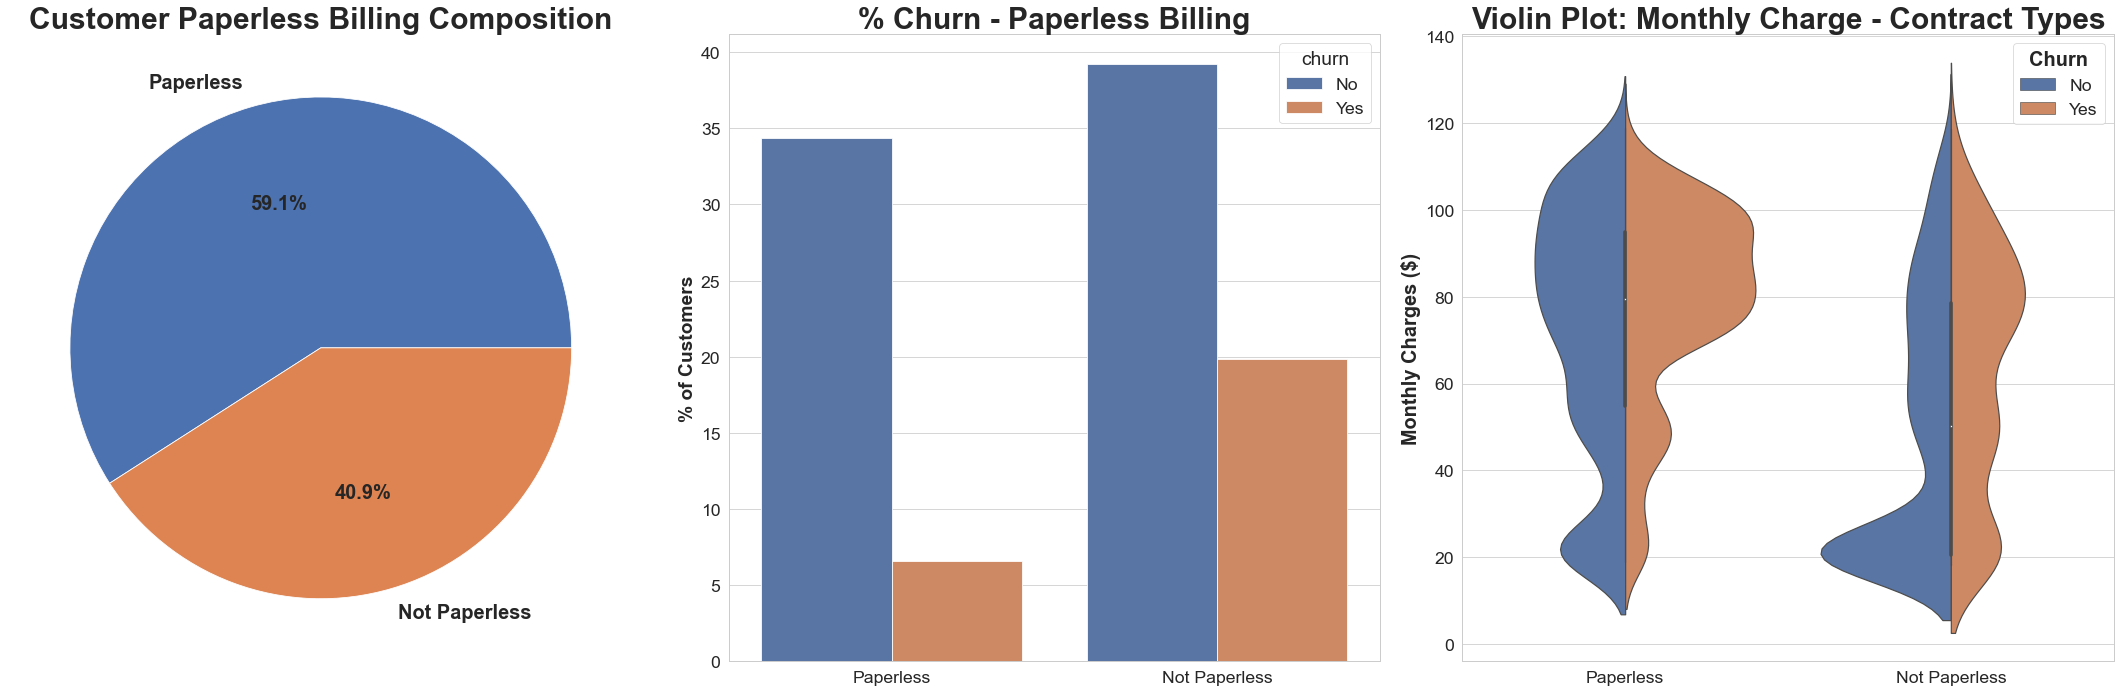

In [32]:
plot_paperless(df)

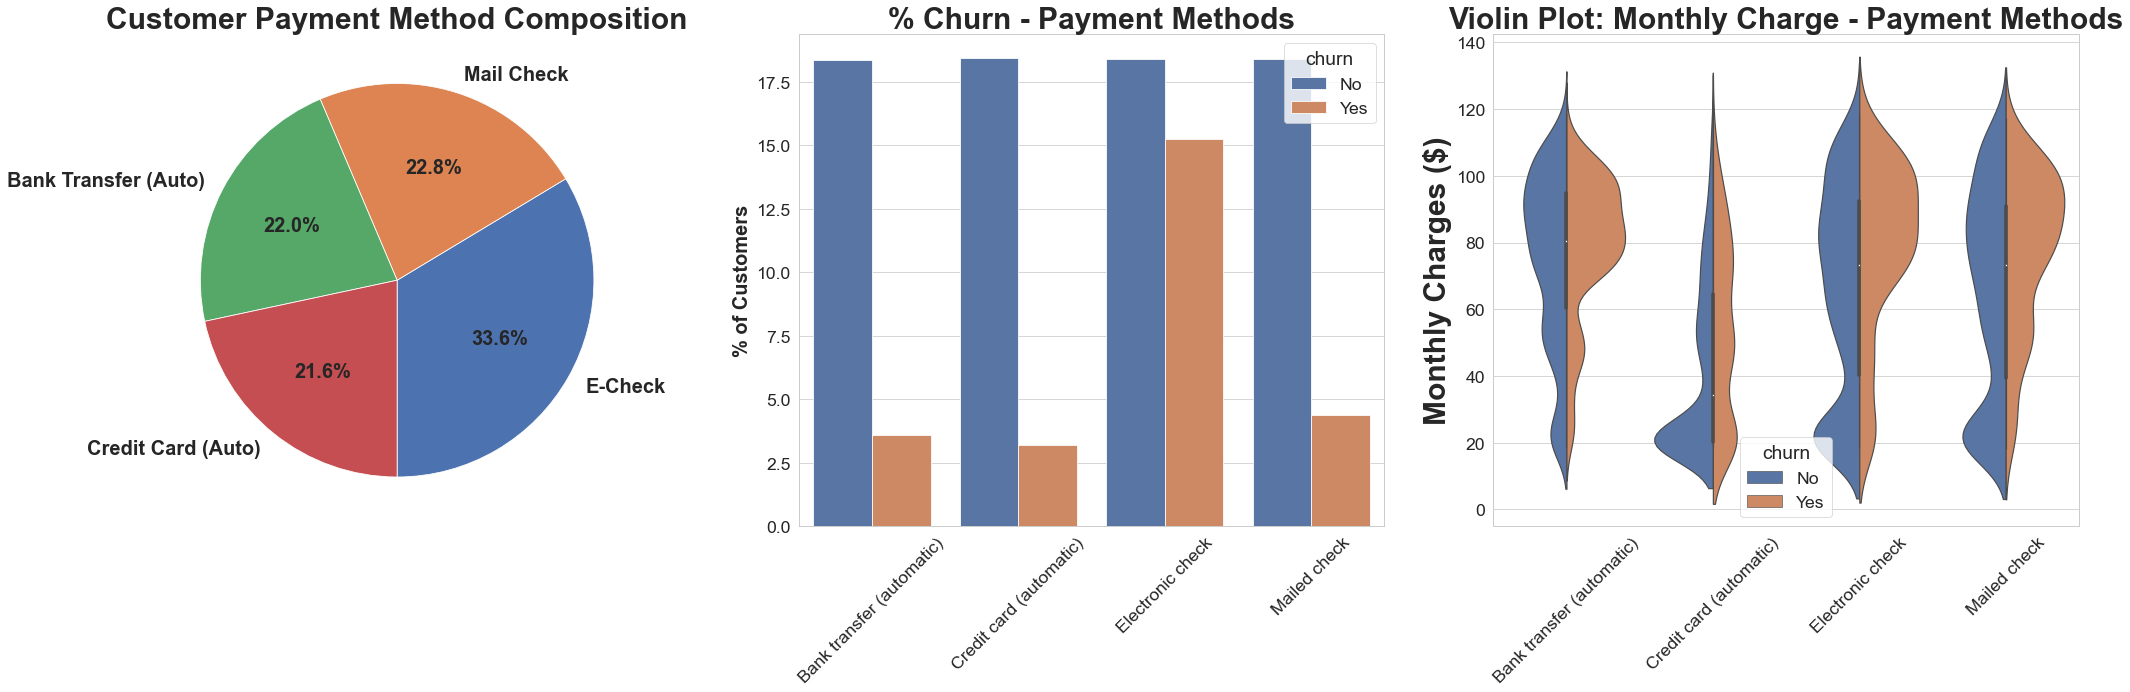

In [33]:
plot_pay_methods(df)

**Payments Conclusions:**
- Customers with non-paperless billing churn almost 15% more than paperless customers
- Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless
- Customers who pay with e-check churn more than 10% than customers with all other payment methods
- Customers who pay by credit card have consistent churn rates regardless of monthly charge, whereas customers paying by bank transfer, e-chcek, or mailed check all see an up-tick in churn once monthly charges rise above 60.


In [42]:
# set first last as index
df_newind = df.set_index('CustomerID')

In [43]:
# replace churn column with numeric binary values
df_newind.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [44]:
# Creat dummy features of objuect type
dummy_df = pd.get_dummies(df_newind, drop_first=True)

<AxesSubplot:>

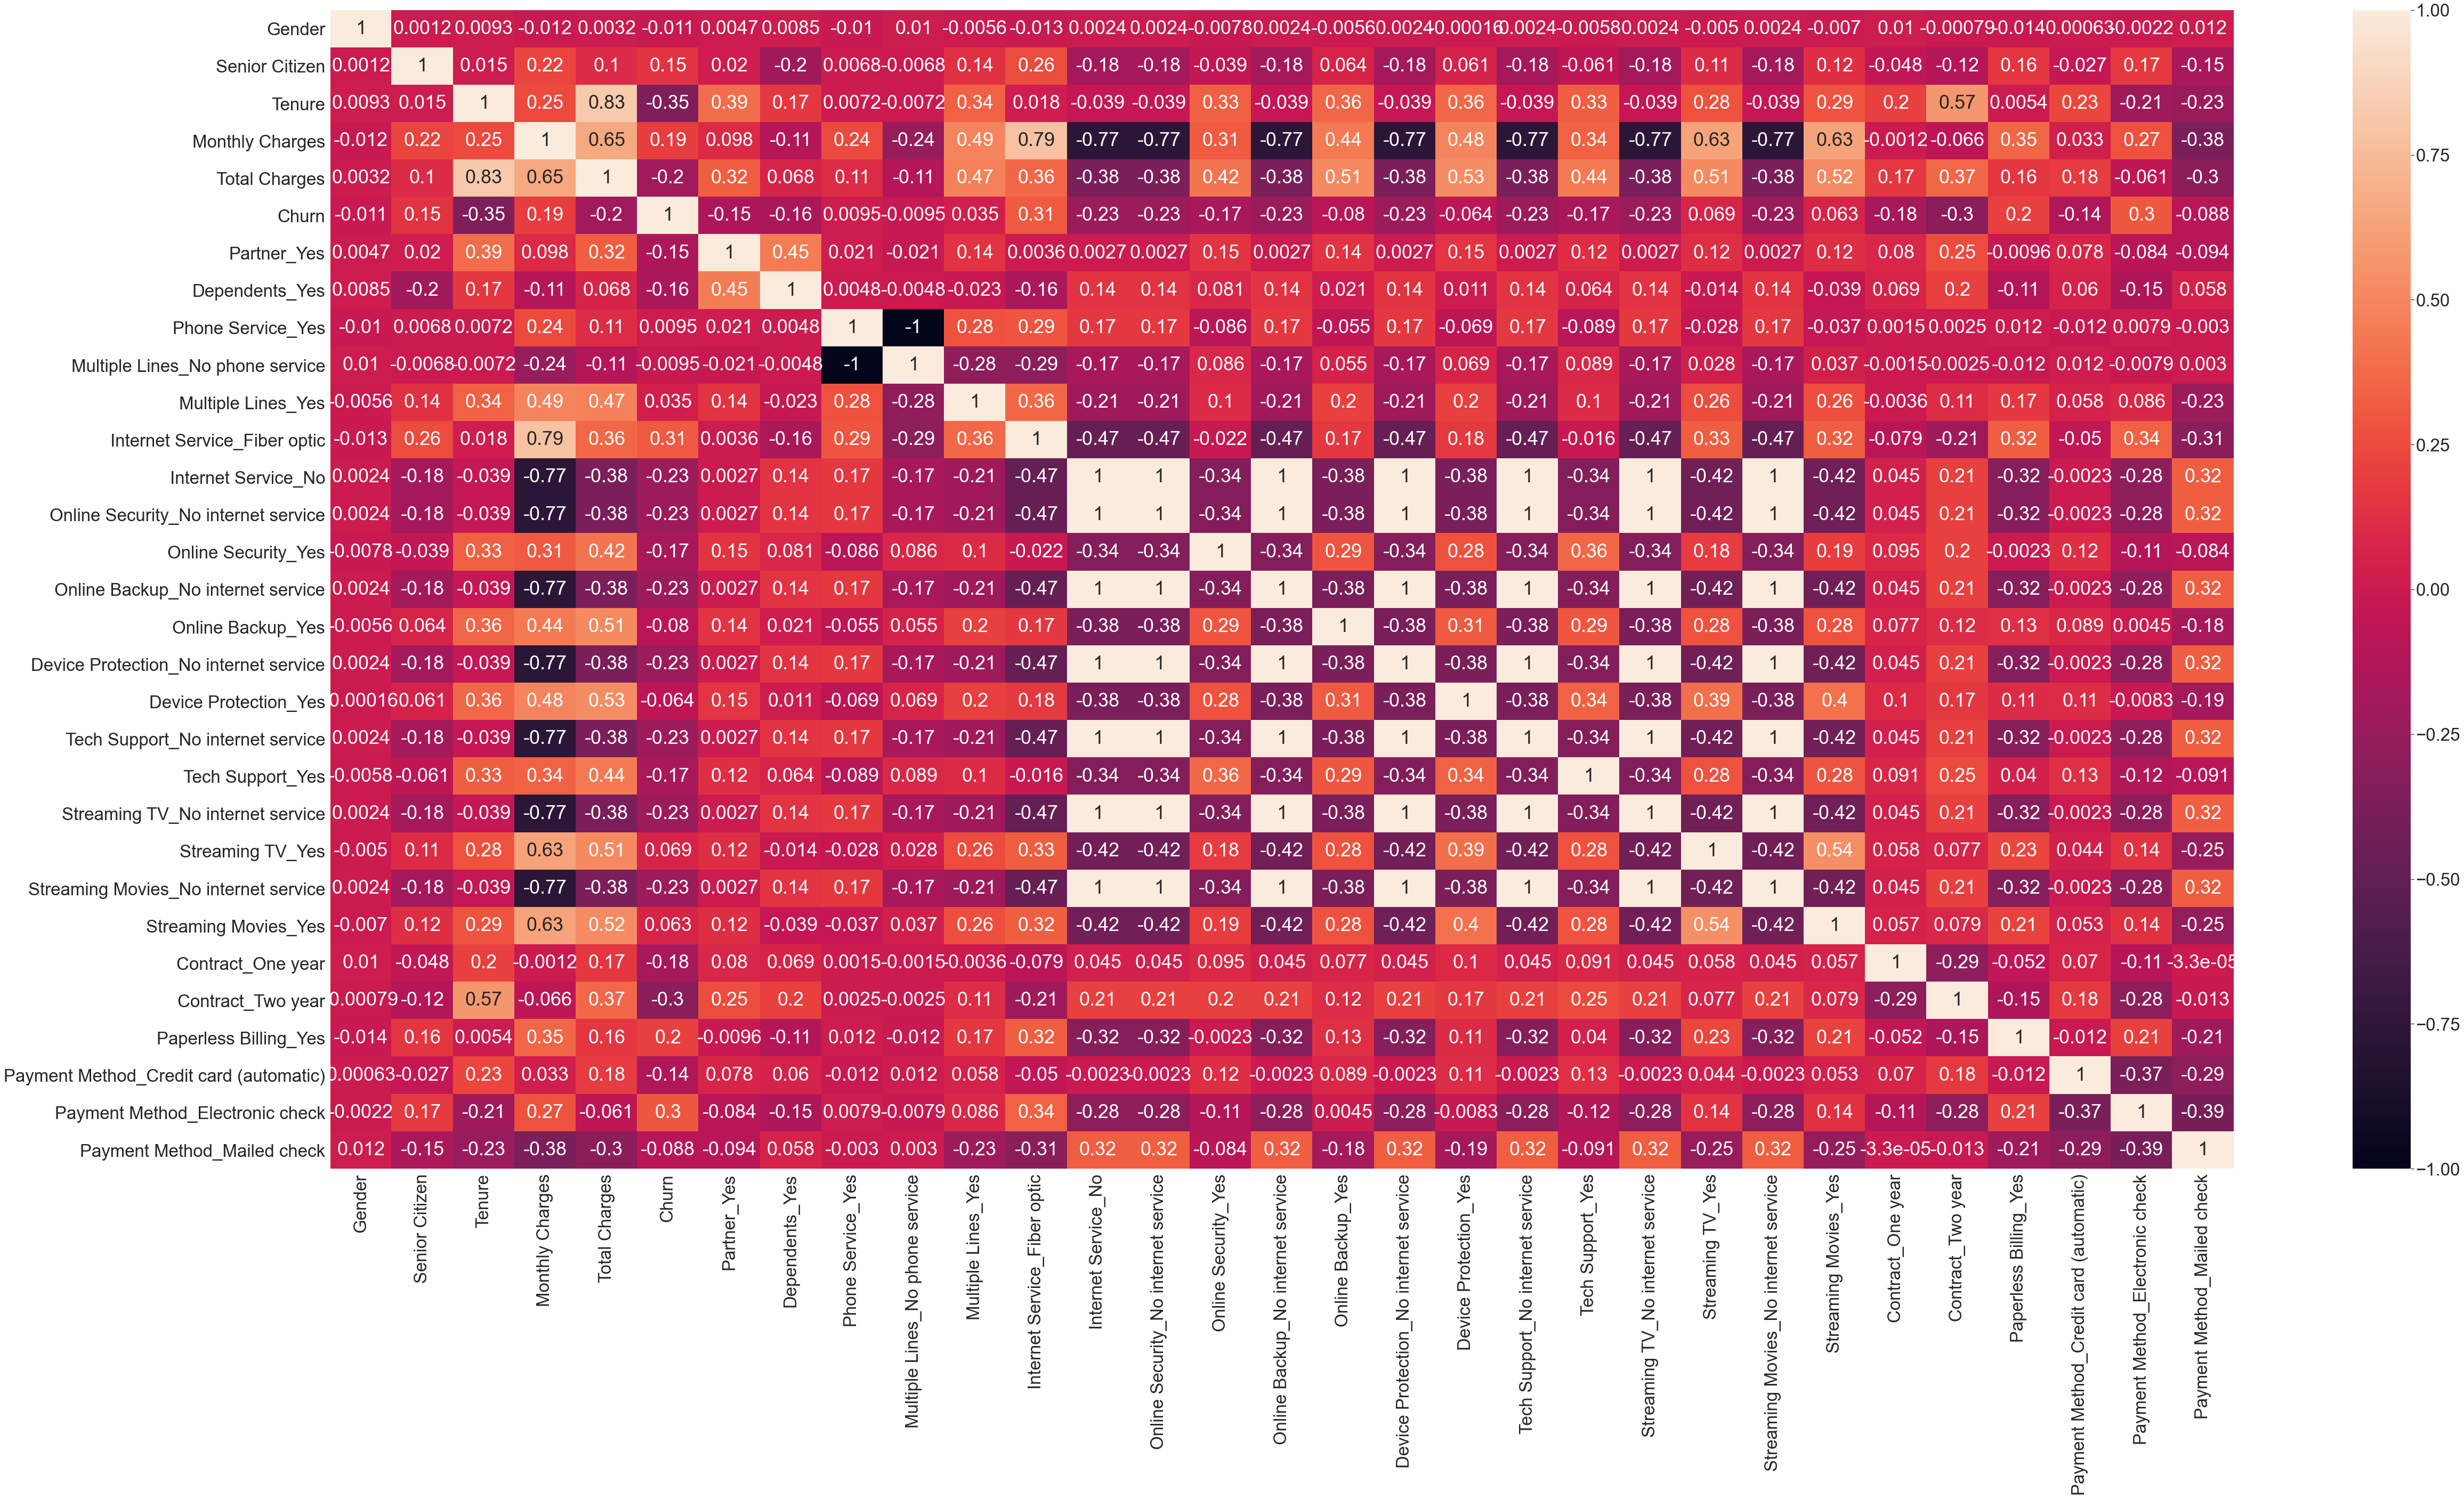

In [45]:
# Make a heatmap of the data
sns.set(font_scale=3)
plt.figure(figsize=(80,40))
sns.heatmap(dummy_df.corr(), annot=True)

As we can see from the heatmap above, there is no signal feature has very strong correlation with customer churn. The features that have the hightest correlation are Tenure, -.35 and payment method, .3.

In [ ]:
More data exploratory on tableau. 
link: 
https://public.tableau.com/app/profile/nick.chen5157/viz/NumericalValuesVSChurnRatio/NumericalValuesVsChurn